In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install medpy==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 16.7 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214947 sha256=ffbbc41e9997f9a46c63b2d0b26efc865d4e41095632268e744c9faccf0c3849
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


In [ ]:
!pip install medpy --upgrade

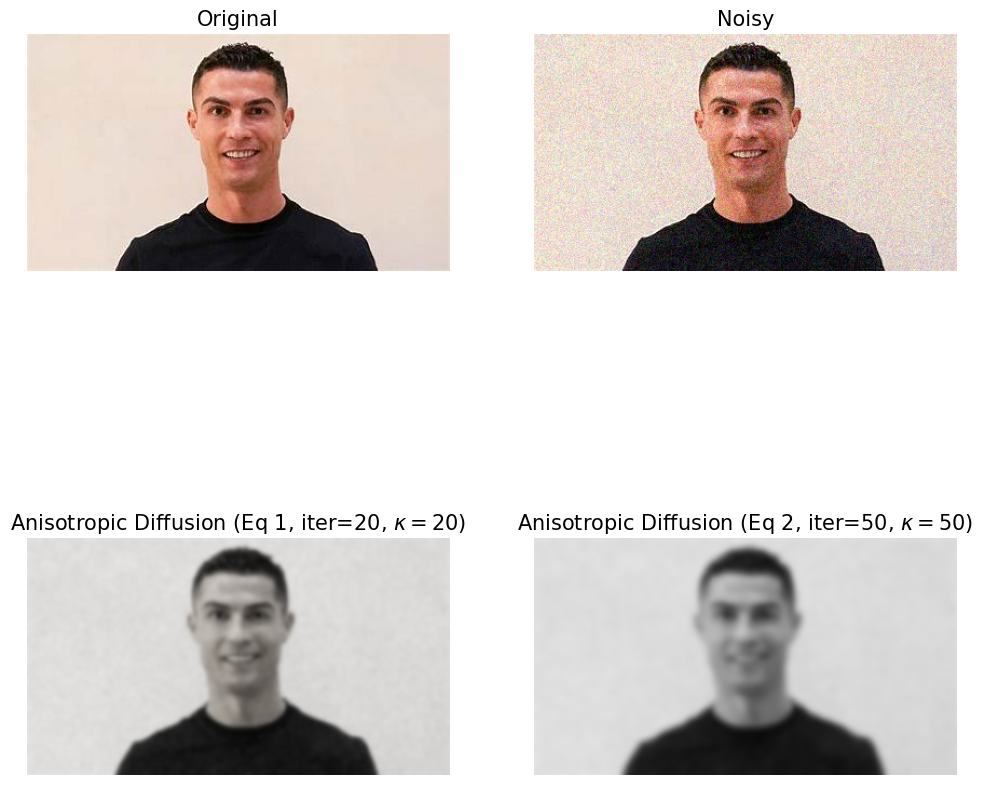

In [ ]:
import os
import numpy as np
import matplotlib.pylab as plt
from medpy.filter.smoothing import anisotropic_diffusion
from skimage.util import random_noise
from skimage.io import imread
from skimage import img_as_float

img_path = '/content/drive/MyDrive/images/RONALDO.jpg'

if not os.path.exists(img_path):
    raise FileNotFoundError(f"Gambar tidak ditemukan: {img_path}")

img = img_as_float(imread(img_path))

noisy = random_noise(img, var=0.005)
noisy = np.clip(noisy, 0, 1)

diffusion_eq1 = anisotropic_diffusion(noisy, niter=20, kappa=20, option=1)

diffusion_eq2 = anisotropic_diffusion(noisy, niter=50, kappa=50, option=2)

plt.figure(figsize=(12, 12))
plt.gray()

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original', size=15)

plt.subplot(2, 2, 2)
plt.imshow(noisy)
plt.axis('off')
plt.title('Noisy', size=15)

plt.subplot(2, 2, 3)
plt.imshow(diffusion_eq1)
plt.axis('off')
plt.title(r'Anisotropic Diffusion (Eq 1, iter=20, $\kappa=20$)', size=15)

plt.subplot(2, 2, 4)
plt.imshow(diffusion_eq2)
plt.axis('off')
plt.title(r'Anisotropic Diffusion (Eq 2, iter=50, $\kappa=50$)', size=15)

plt.show()